# Kolmogorov Test

Name: Arthur Pontes Nader

## Libraries

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math
import pandas as pd

from scipy.stats import kstest

## Cumulative Distribution Function

The cdf is a mathematical function that shows how probabilities are accumulated on the real axis. So it always goes from 0 to 1

In [2]:
k = np.arange(0,20)
n = 20
prob = 0.4

cum_probs = stats.binom.cdf(k, n, prob)

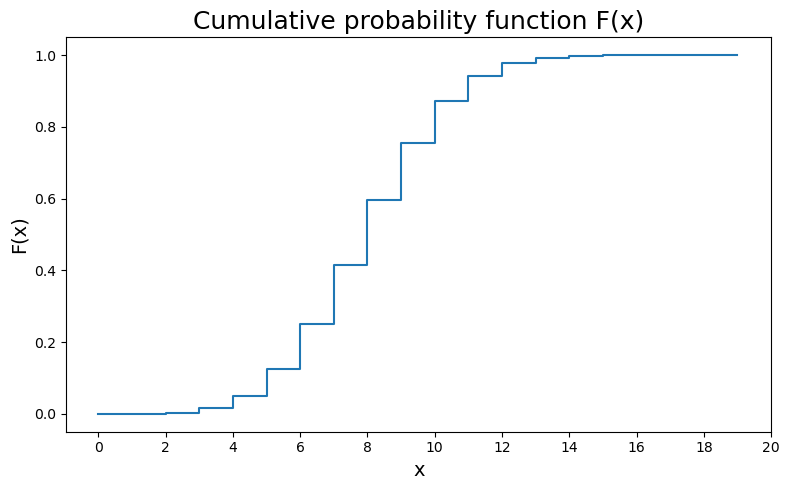

In [3]:
plt.figure(figsize=(8, 5))

plt.step(k, cum_probs, where='post')
plt.title('Cumulative probability function F(x)', fontsize = 18)
plt.xlabel('x', fontsize = 14)
plt.ylabel('F(x)', fontsize = 14)
plt.xticks(np.arange(0, n+1, 2))

plt.tight_layout()
plt.show()

For the continuous case:

In [4]:
x = np.linspace(-3, 3, 100)
cum_probs_2 = stats.norm.cdf(x, 0 , 1)

In [5]:
def plot(x, cum_probs):

    plt.figure(figsize=(8, 5))

    plt.plot(x, cum_probs, color='blue')
    plt.title('Cumulative probability function F(x)', fontsize = 18)
    plt.xlabel('x', fontsize = 14)
    plt.ylabel('F(x)', fontsize = 14)
    plt.xticks(np.arange(min(x), max(x)+1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

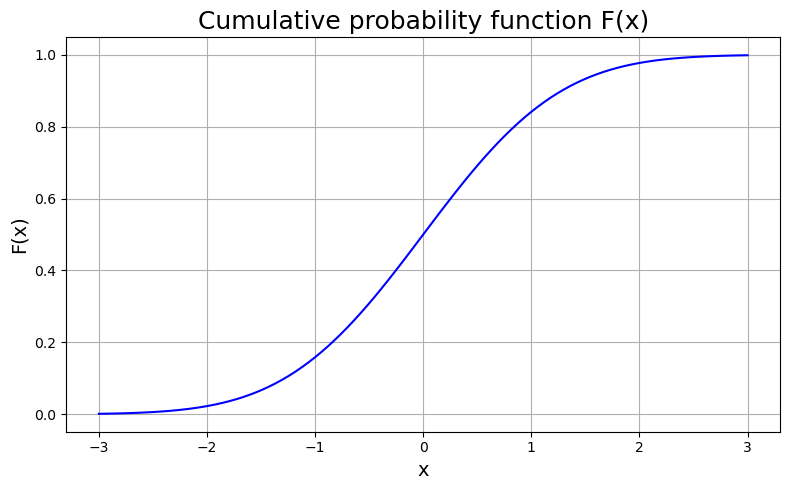

In [6]:
plot(x, cum_probs_2)

The cdf is useful for several reasons, but for now it's important to know that you can use it to measure distances between probability distributions. To do this, firstly we have to study the emprical cdf.;

## Empirical Cumulative Distribution Function

Let $y_1$, $y_2$, ..., $y_n$ a set of real numbers. The empirical cdf is a function $ \widehat{F}_n : \mathbb{R} \rightarrow [0, 1] $, such that, for any $ y \in\mathbb{R}$, we have:

$$ \widehat{F}_n(y) = \frac{\#\{y_i ≤ y\}}{n} $$

In other words, the proportion of $y_i$ that are less then $y$. Let's try some example:

In [55]:
x = np.linspace(0, 25, 2501)

In [56]:
cum_probs = stats.expon.cdf(x, scale = 1/0.24);

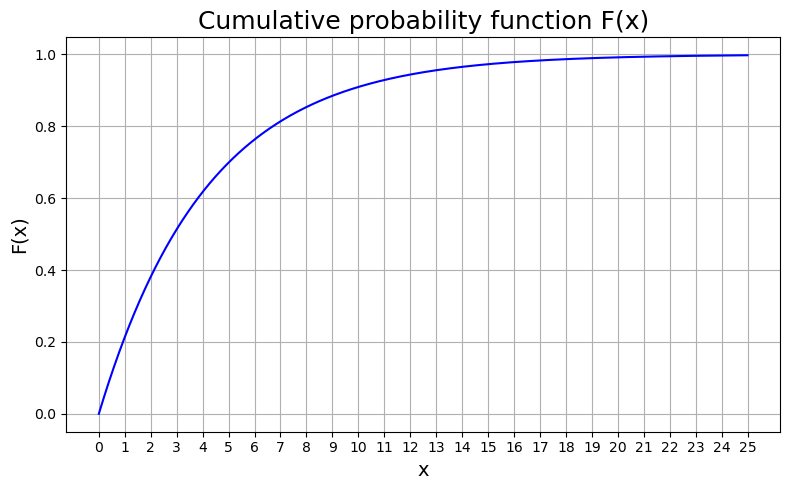

In [57]:
plot(x, cum_probs)

Now, we will generate samples from this distribution:

In [58]:
samples = stats.expon.rvs(scale = 1/0.24, size=100)

In [59]:
samples_sorted = np.sort(samples)

empirical_cdf = np.arange(1, len(samples_sorted) + 1) / len(samples_sorted)
empirical_cdf[:20]

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])

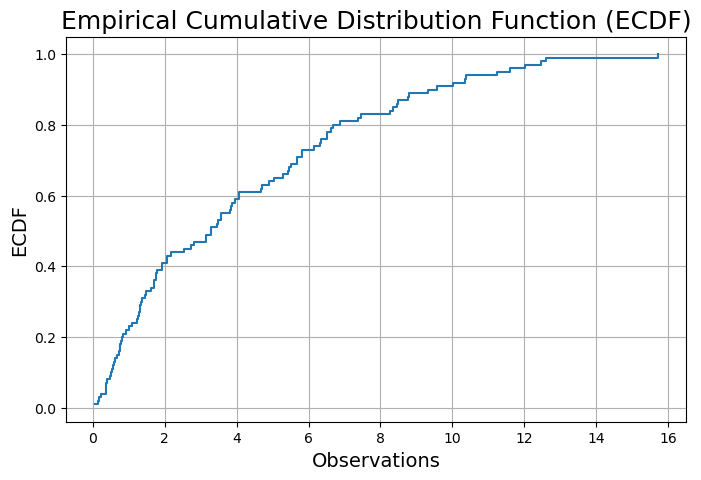

In [60]:
plt.figure(figsize=(8, 5))
plt.step(samples_sorted, empirical_cdf, where='post')
plt.title('Empirical Cumulative Distribution Function (ECDF)', fontsize = 18)
plt.xlabel('Observations', fontsize = 14)
plt.ylabel('ECDF', fontsize = 14)
plt.grid(True)
plt.show()

Now, let's see the two graphs in the same figure:

In [61]:
def plot_cdfs(x, cum_probs, samples_sorted, empirical_cdf):

    plt.figure(figsize=(8, 5))

    plt.plot(x, cum_probs, color='blue')
    plt.step(samples_sorted, empirical_cdf, where='post')
    plt.title('Empirical CDF and Theoretical CDF')
    plt.xlabel('x', fontsize = 14)
    plt.ylabel('F(x)', fontsize = 14)
    plt.xticks(np.arange(min(x), max(x)+1, 1))
    plt.legend(["Theoretical", "Empirical"])

    plt.grid(True)
    plt.tight_layout()
    plt.show()

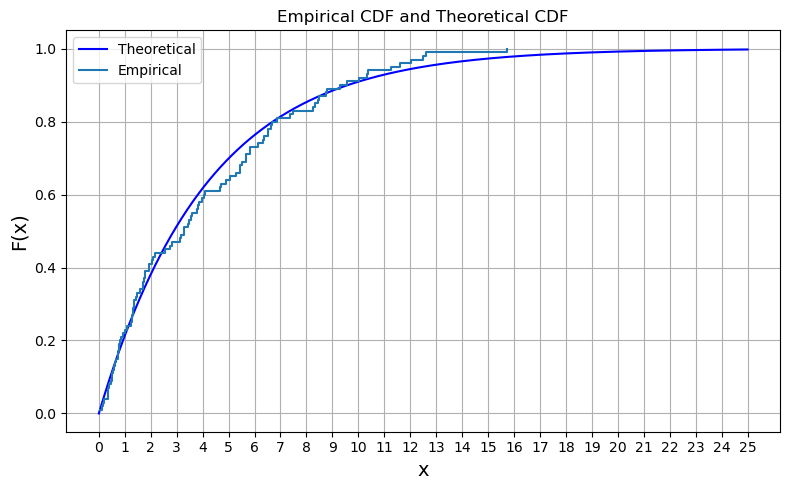

In [62]:
 plot_cdfs(x, cum_probs, samples_sorted, empirical_cdf)

If we have $\widehat{F}_n(x) \approx F(x)$ for each possible value of x, we can conclude that the adopted model fits the data well. But how can we know if $\widehat{F}_n(x) \approx F(x)$?

Think a little before we move on: how the number of collected samples can be related to the distance? Imagine extreme cases: If we have just 5 values and if we have 10000000 of values that come from the distribution.

## Kolmogorov test

Consider $D_n = max_x|\widehat{F}_n(x) - F(x)|$.
If $D_n \approx 0$, the adopted model fits the data well. Kolmogorov studied the behavior of $D_n$

In [63]:
def d_max(cum_probs, samples):
    
    d_max = 0
    
    for i in np.arange(0,25,0.1):
        emp = np.sum(samples < i)/len(samples)
        teo = cum_probs[int(100*i)]
    
        if abs(emp-teo) > d_max:
            d_max = abs(emp-teo)
    
    return d_max

In [64]:
d_max(cum_probs, samples)

0.06637589662959187

Let's suppose F(x) is the true model. So $D_n \rightarrow 0$ as $n \rightarrow \infty$

In [65]:
cum_probs = stats.expon.cdf(x, scale = 1/0.24);

for i in [100,1000,10000,100000, 1000000]:
    samples = stats.expon.rvs(scale = 1/0.24, size=i)
    print(d_max(cum_probs, samples))

0.06600412869186256
0.020685949236544765
0.009381528228312563
0.0016341286918625242
0.0006313260710310575


Let's suppose F(x) is not the true model. So $D_n$ converges to a value > 0

In [66]:
cum_probs = stats.expon.cdf(x, scale = 1/0.24);

for i in [100,1000,10000,100000, 1000000]:
    samples = stats.expon.rvs(scale = 1/0.32, size=i)
    print(d_max(cum_probs, samples))

0.09027051982381162
0.10329366018615893
0.10541998009758602
0.10648788611717064
0.10640381477591765


(You, can notice this code is not working for every possible instance. If you have time, write a general function to calculate this d_max and email it to me! I was late for class at the time I wrote this code. You can also graph both situations for a large amount of data: in the second, you will notice that cdf and ecdf do not overlap).

##  It seems like something is missing

How close to zero $D_n$ has to be for us to accept the theoretical model $F(x)$? $D_n$ = 0.01 is small enough? Well, depends on sample size. But it depends on the model $F(x)$?

How fast does $D_n$ decrease towards 0? Kolmogorov showed that:

- $ n \cdot D_n \rightarrow \infty  $ (degenerates).
- $ \log(n) \cdot D_n \rightarrow 0  $ (degenerates).
- $ \sqrt{n}D_n \rightarrow 0 $ and also $ \sqrt{n}D_n \rightarrow \infty.$ becomes (randomly) stabilized.
- Any other power leads to degenerated results.
- $ n^{0.5+\epsilon}D_n \rightarrow \infty .$
- $ n^{0.5-\epsilon}D_n \rightarrow 0 .$

Kolmogorov claimed that $\sqrt{n}D_n \rightarrow K$ , where K is a distribution that does not depend on $F(x)$. In other words, $\sqrt{n}D_n$ is random but its distribution is the same in every problem.

This means we have a universal metric to measure distance between $\widehat{F}(x)$ and the true distribution, whatever this true distribution is!!!

Just for to you know, K is a distribution of a brownian bridge.

In [19]:
def brownian_bridge(x, terms=10000): # terms should be inf, but we will use 10000 as an approximation :)
    
    result = 0
   
    for k in range(1, terms + 1):
        coefficient = (-1)**(k + 1) * k**2
        exponential = math.exp(-2 * k**2 * x**2)
        result += coefficient * exponential
    
    return 8 * x * result

x_value = 0.5
result = brownian_bridge(x_value)
print("f(0.5) =", result)

f(0.5) = 0.6395828509404565


In [20]:
x_range = np.linspace(0, 2.5, 1001)

pdf = [brownian_bridge(x_val) for x_val in x_range]

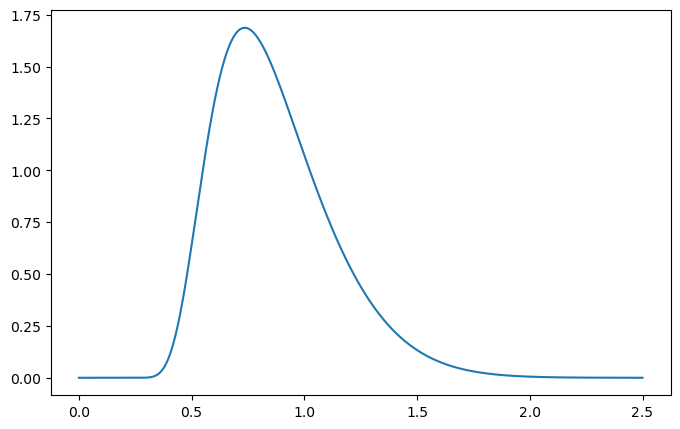

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(x_range, pdf)
plt.show()

If we calculate $D_n$ using the true model $F(x)$ that generated the data then $\sqrt{n}D_n$ must be between 0.4 and 1.8.
If we do not use the true model, we know that $\sqrt{n}D_n \rightarrow \infty $

$\sqrt{n}D_n > 1.8$ is a strong evidence that $F(x)$ is not the model that generate the data

A less extreme cutoff point: if  $F(x)$ is the model that generated the data, then the probabilty of $\sqrt{n}D_n > 1.36$ is only 5%.

So, if $\sqrt{n}D_n > 1.36$, reject the model. Otherwise, go ahead with the model

## Using the library

There is a function in stats that calculate D and the p_value for some data and distribution. You can check the details here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [22]:
def kolmogorov_test(n):

    data = np.random.normal(0, 1, size=n)
    D, p_value = kstest(data, 'norm')

    return D, p_value

In [23]:
n = 100

In [24]:
D, p_value = kolmogorov_test(n)

if p_value < 0.05:
    print("Reject the model")
else:
    print("Go ahead")

Go ahead


In [25]:
D, (n**0.5)*D, p_value

(0.055945118613391354, 0.5594511861339135, 0.8955269258246552)

Let's repeat the test 5000 times:

In [26]:
D_values = []
p_values = []

for _ in range(5000):

    D, p_value = kolmogorov_test(n)
    
    D_values.append(D)
    p_values.append(p_value)

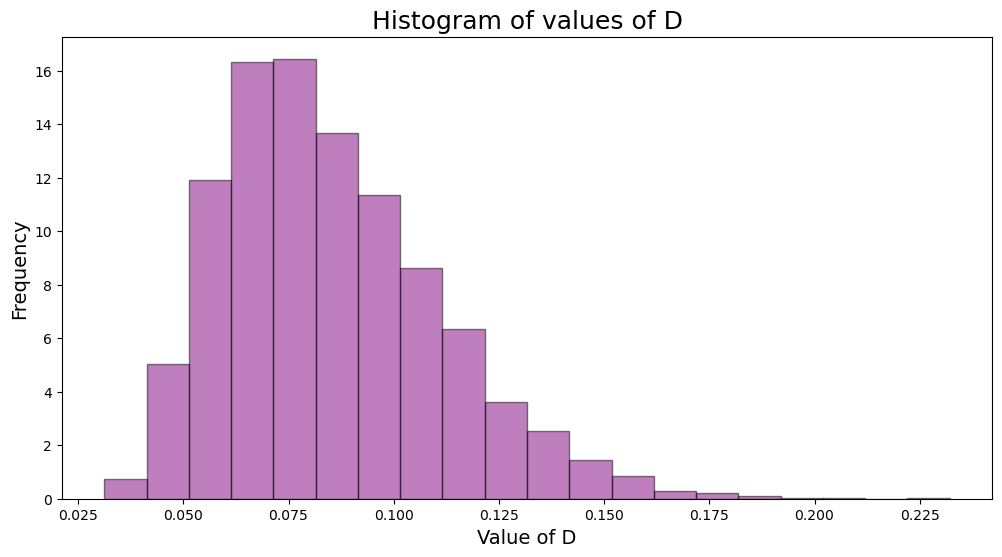

In [27]:
plt.figure(figsize=(12, 6))
plt.hist(D_values, density=True, bins=20, alpha=0.5, color='purple', edgecolor = "black")
plt.xlabel('Value of D', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title("Histogram of values of D", fontsize = 18)
plt.show()

We can notice the values of D concentrate between 0.050 e 0.100.

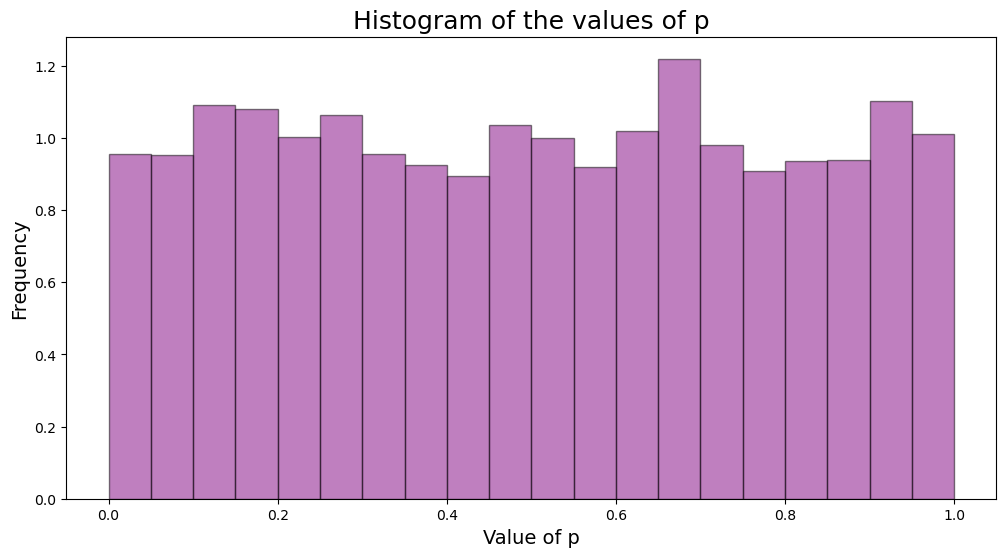

In [28]:
plt.figure(figsize=(12, 6))
plt.hist(p_values, density=True, bins=20, alpha=0.5, color='purple', edgecolor = "black")
plt.xlabel('Value of p', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title("Histogram of the values of p", fontsize = 18)
plt.show()

The p_value seems to be uniform distributed between 0 and 1.0

In [29]:
proportion = np.sum(np.array(p_values)<0.05)/5000
print("Proportion of p_value that are less than 0.05: ", proportion)

Proportion of p_value that are less than 0.05:  0.0478


Therefore, how we expected, we reject the true model approximately 5% of the time.

## Are the aliens waking up?

It's a stormy day, the sky is falling over the mountains. Your friend watched "War of the Worlds" last night and he collected the timestamp between the thunders that woke up the aliens in the beginning of the movie. He assumes that those thunders came from a Poisson distribution with lambda equal to 13. So, the expected value of thunders per minute is 13. He is counting the number of thunders per minute during the first hour of the storm and calls you, worried:

'I emailed you the data I collected. What do you think? Are we in trouble?'

In [30]:
data = [13, 15,  7, 18, 11,  9,  5,  7, 11, 13, 15, 12, 12, 11,  7,  7,  7,
       11, 13,  4, 13,  7,  8, 13,  7,  7, 13,  9, 10,  8, 13,  6, 11, 19,
       11, 10, 12,  9, 10, 12, 14, 11,  8, 14, 12, 15, 12, 14, 11, 16, 14,
       10,  9,  9,  8, 19, 10, 12,  7, 13]

In [31]:
D, p_value = kstest(data, 'poisson', args = (13,))

In [32]:
p_value

0.0012760999229579628

In [33]:
if p_value < 0.05:
    print("Relax, everything is fine")
else:
    print("We are in trouble!!!")

Relax, everything is fine


After another 4 hours of storm, your friend sends you the new data he collected:

In [34]:
new_data = [ 6, 18, 12, 17, 16, 19, 11, 12,  9, 16, 14, 18, 17, 14, 13, 14, 17,
       13, 19,  9, 14, 16, 11, 12, 11, 15, 10, 19, 16, 13, 18, 16, 14, 16,
       17, 11,  4, 17, 16,  9, 11, 17, 12, 10, 10, 14, 15,  9, 18, 18,  8,
        9, 12, 11, 18, 16, 10,  8, 11, 16, 11, 19, 13,  6,  5, 17, 13, 14,
       12, 12, 15, 10,  9,  7, 16, 18, 19,  9, 16, 17, 17, 18, 14,  9,  9,
       13, 12, 11, 10, 10, 13, 11, 16,  9, 15, 14, 10, 10, 13, 14, 16, 11,
       18, 21, 11,  9, 13,  5, 12, 10, 14, 14, 13,  4, 17, 20, 15, 12, 12,
       14, 21, 16, 11, 16,  8, 15,  6,  7, 14, 15, 17, 13, 14, 19, 11, 16,
       11, 13, 16, 14, 11, 12,  8, 16, 16, 11,  9, 11, 10, 17,  6,  7, 10,
       21, 13, 15, 10,  6, 14, 13, 12, 15,  9, 17, 11, 18, 15, 10, 18, 22,
       14, 13, 12, 16, 10, 10, 16, 15, 22, 15, 11, 10, 11, 20, 13, 17,  9,
       12, 11, 13, 12,  9, 15,  8, 12, 15, 11, 14, 15,  9, 15,  8, 14, 11,
       13, 13,  5, 14, 10, 12, 20, 12, 13, 10,  6, 14, 13,  3, 14, 17, 15,
       12, 14, 15, 12, 14, 11, 18, 13, 11, 14, 11, 12, 15, 15, 10, 14, 12,
       12, 10]

In [35]:
data = data + new_data

In [36]:
D, p_value = kstest(data, 'poisson', args = (13,))

In [37]:
p_value

0.06420764114684763

In [38]:
if p_value < 0.05:
    print("Relax, everything is fine")
else:
    print("We are in trouble!!!")

We are in trouble!!!
